# GEO877: Spatial Algorithms

## Practical 5: Convex hull

I've prepared a solution to the convex hull problem. It is not object oriented, so that you can see all of the code in one place.

I do three things:

1. **Find the minimum point** I do this using a so-called lamda function, which finds the minimum in my array using first the y coordinates, then the x

2. **Sort by cosine** Since this doesn't solve for points at the same angle, I also sort by distance. To do this, I first calculate angles and distances with respect to every point and my anchor point using a function. I then use another lambda function to sort by first cosine, and then in case of ties, distance. Since cosine values of 1 (maximum) are the first (for counter-clockwise) I sort in reverse order, and thus I sort on negative distances

3. **Finally, calculate the Graham scan**. As we discussed in the lecture, I use a stack. I check each triplet of points, and where I find a right turn, I remove the point. When this happens, my triplet is recalculated, and by doing so I step back if need be to recheck previous points with respect to new neighbours. 

You can swap between 3 datasets. A small set of points we have seen before, a set of random points (make this big to force tricky situations, since these points are integers), and the geometry of England. My code works for all three cases. Try to break it!!

In [2]:
# SETUP
# =====
import pandas as pd
import random as rand
import matplotlib.pyplot as plt
import math

[-10, -10]

Points sorted by cosine angle from start point:


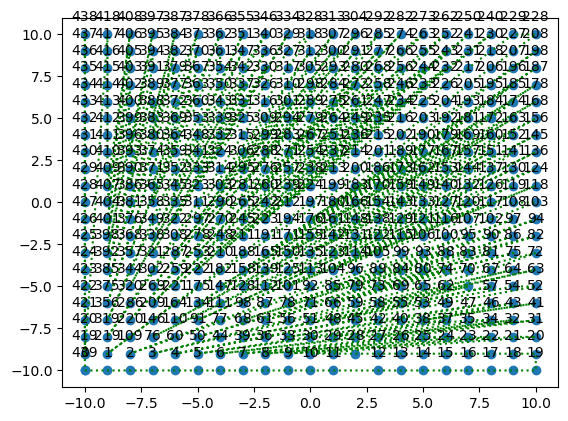

In [13]:
# This function calcuates the cosine and the distance between two points
# If the points are identical, the cosine is "2" and the distance 0
# otherwise the cosine is as calculated and between 1 and -1
def angle(p, q):
    if p == q:
        return 2, 0
    else:
        h = math.sqrt((p[1] - q[1])*(p[1] - q[1]) + (p[0] - q[0])*(p[0] - q[0]))
        a = p[0] - q[0]
        return a/h, h 
    
sample = []
data = 'random' #can be "small", "random" or "England" for testing
random = True

# Load either a small prepared dataset, a set of random points or the outline of England
if (data == 'small'):
    sample = [[0,5],[0,10],[0,2],[5,0], [10,10], [15,0], [20,10], [25, 0],
             [30, 20], [35, 15], [45, 0], [50, 50], [45, 40], 
             [40, 50], [30, 45], [25, 40], [20, 30], [15, 50],
             [10,35], [5, 50],[5,50], [0, 10]]

elif (data == 'random'):
    for i in range(2000): # Create 1000 random Points to test
        x = rand.randint(-10,10)
        y = rand.randint(-10,10)
        sample.append([x,y])

elif (data == 'England'):
    data_folder = ""   # specify folder where dataset is
    data_file = "polygon_testData.csv"
    input_string = data_folder + data_file
    col_names = ['x', 'y']
    df = pd.read_csv(input_string, sep = ",", header=None, names=col_names)
    sample = df.values.tolist()

sample = (list(map(list,set(map(tuple,sample))))) #Remove duplicates (from a list of lists)

# Find our anchor point (sort by y, then x)
miny = min(sample, key=lambda p:(p[1],p[0]))
print(miny)

# Calculate the angles and distance of every point with respect to our anchor
# We then store these as new elements in the list of lists (i.e. we now have x,y,angle,distance in positions [0,1,2,3])
for p in sample:
    a, d = angle(p, miny)
    p.append(a)
    p.append(d)
    
# sort in reverse order using cosine and distance (for collinear points)
# distance is negative, so that near things come first
sortedPts = sorted(sample, key=lambda point: (point[2], -point[3]), reverse=True)
sortedPts.append(sortedPts[0]) #Close the polygon

print(f'\nPoints sorted by cosine angle from start point:')
#print(sortedPts)

# Plot the points and their labels, so that we can see they are sorted
xsall = [row[0] for row in sortedPts]
ysall = [row[1] for row in sortedPts]
plt.scatter(xsall,ysall)

# zip joins x and y coordinates in pairs
i = 0
for x,y in zip(xsall,ysall):
    label = f"{i}" #Label the points according to their index
    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    i = i + 1

#Plot the polygon we get from the sorted points
plt.plot(xsall, ysall, linestyle='dotted', color="green")    

Original data set had 440 points, hull has 5 (both include duplicate end point).


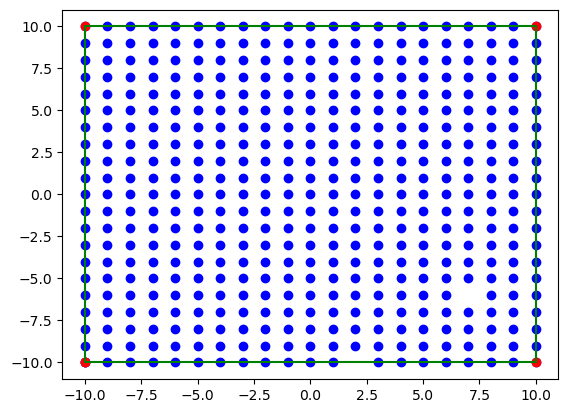

In [14]:
# Calcuate the determinant, for the turning rule
# We could use our existing method here, but for readability it is here
def cross(p1, p2, p3):
    return (p2[0] - p1[0])*(p3[1] - p1[1]) - (p2[1] - p1[1])*(p3[0] - p1[0])

# Graham Scan
hullPts = [sortedPts[0]] # First point is on the hull by definition

# This very elegant solution is adapted slightly from the last lines of code here:
#https://leetcode.com/problems/erect-the-fence/discuss/103300/Detailed-explanation-of-Graham-scan-in-14-lines-(Python)

# Iterate through the points
for p in sortedPts:
    hullPts.append(p)
    # If we already have more than 2 points, and the points are collinear (0) or make a 
    # right turn, we delete the middle point
    while len(hullPts) > 2 and cross(hullPts[-3], hullPts[-2], hullPts[-1]) <= 0:
        hullPts.pop(-2)

# This code prints our points and hull to the screen
hxsall = [row[0] for row in hullPts]
hysall = [row[1] for row in hullPts]
plt.plot(hxsall, hysall, linestyle='solid', color="green") #Hull
plt.scatter(xsall,ysall,color="blue")   #All points
plt.scatter(hxsall,hysall,color="red")  #Hull points

print(f'Original data set had {len(sortedPts)} points, hull has {len(hullPts)} (both include duplicate end point).')